In [89]:
!binwalk ap1_v131.frm


DECIMAL       HEXADECIMAL     DESCRIPTION
--------------------------------------------------------------------------------



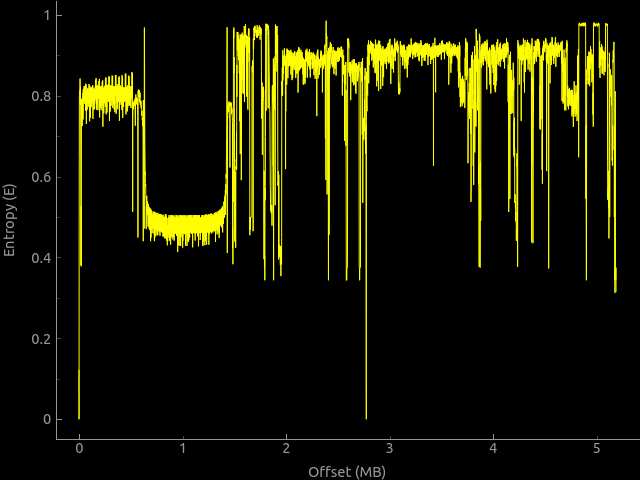

In [90]:
from IPython.display import Image
Image(filename='entropy.png')
# entropy.png was generated from binwalk

In [91]:
data = open('ap1_v131.frm','rb').read()
import binascii
print data[:0xff]
print '-'*80
print binascii.hexlify(data[:0xff])

UNITY FILE V1.10 / RICOH COMPANY O8    ������������������������    *R@z01firm6    ENQ'ENENQ'��������������������������������  . $� ap1_v131up  ENQ'ENENQ'������������������������������������������������������������������������������������������������
--------------------------------------------------------------------------------
554e4954592046494c452056312e3130202f205249434f4820434f4d50414e59004f380000000002ffffffffffffffffffffffffffffffffffffffffffffffff00000004002a52407a30316669726d3600000020454e5127454e454e51270101ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff0000152e0024dc006170315f7631333175700020454e5127454e454e51278001ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff


In [92]:
def hexdump(src, offset=0, length=16):
    FILTER = ''.join([(len(repr(chr(x))) == 3) and chr(x) or '.' for x in range(256)])
    lines = []
    for c in xrange(0, len(src), length):
        chars = src[c:c+length]
        hex = ' '.join(["%02x" % ord(x) for x in chars])
        printable = ''.join(["%s" % ((ord(x) <= 127 and FILTER[ord(x)]) or '.') for x in chars])
        lines.append("%04x  %-*s  %s\n" % (c+offset, length*3, hex, printable))
    return ''.join(lines)

In [131]:
from itertools import cycle
def xor(data, key):
    return ''.join([chr(ord(c1) ^ ord(c2)) for c1,c2 in zip(data, cycle(key))])
print hexdump(xor('\x00'*12,'\x11\x22\x33\x44'))

 0000  11 22 33 44 11 22 33 44 11 22 33 44               ."3D."3D."3D



In [94]:
print hexdump(data[:0xff], 0)

0000  55 4e 49 54 59 20 46 49 4c 45 20 56 31 2e 31 30   UNITY FILE V1.10
0010  20 2f 20 52 49 43 4f 48 20 43 4f 4d 50 41 4e 59    / RICOH COMPANY
0020  00 4f 38 00 00 00 00 02 ff ff ff ff ff ff ff ff   .O8.............
0030  ff ff ff ff ff ff ff ff ff ff ff ff ff ff ff ff   ................
0040  00 00 00 04 00 2a 52 40 7a 30 31 66 69 72 6d 36   .....*R@z01firm6
0050  00 00 00 20 45 4e 51 27 45 4e 45 4e 51 27 01 01   ... ENQ'ENENQ'..
0060  ff ff ff ff ff ff ff ff ff ff ff ff ff ff ff ff   ................
0070  ff ff ff ff ff ff ff ff ff ff ff ff ff ff ff ff   ................
0080  00 00 15 2e 00 24 dc 00 61 70 31 5f 76 31 33 31   .....$..ap1_v131
0090  75 70 00 20 45 4e 51 27 45 4e 45 4e 51 27 80 01   up. ENQ'ENENQ'..
00a0  ff ff ff ff ff ff ff ff ff ff ff ff ff ff ff ff   ................
00b0  ff ff ff ff ff ff ff ff ff ff ff ff ff ff ff ff   ................
00c0  ff ff ff ff ff ff ff ff ff ff ff ff ff ff ff ff   ................
00d0  ff ff ff ff ff ff ff ff ff ff ff ff ff ff ff 

In [95]:
section1 = data[0x800:0xa00]
print hexdump(section1, 0x800)

0800  2a 39 57 c2 49 39 44 d7 3e 2a 53 d1 2c 29 44 92   *9W.I9D.>*S.,)D.
0810  fa e6 97 23 f8 e6 96 12 d8 f2 86 06 f8 f6 9f 06   ...#............
0820  f8 e6 96 12 07 19 69 ed 07 19 69 ed 07 19 69 ed   ......i...i...i.
0830  07 19 69 ed 07 19 69 ed 07 19 69 ed 07 19 69 ed   ..i...i...i...i.
0840  07 19 69 ed 07 19 69 ed 07 19 69 ed 07 19 69 ed   ..i...i...i...i.
0850  07 19 69 ed 07 19 69 ed 07 19 69 ed 07 19 69 ed   ..i...i...i...i.
0860  07 19 69 ed 07 19 69 ed 07 19 69 ed 07 19 69 ed   ..i...i...i...i.
0870  07 19 69 ed 07 19 69 ed 07 19 69 ed 07 19 69 ed   ..i...i...i...i.
0880  07 19 69 ed 07 19 69 ed 07 19 69 ed 07 19 69 ed   ..i...i...i...i.
0890  07 19 69 ed 07 19 69 ed 07 19 69 ed 07 19 69 ed   ..i...i...i...i.
08a0  07 19 69 ed 07 19 69 ed 07 19 69 ed 07 19 69 ed   ..i...i...i...i.
08b0  07 19 69 ed 07 19 69 ed 07 19 69 ed 07 19 69 ed   ..i...i...i...i.
08c0  07 19 69 ed 07 19 69 ed 07 19 69 ed 07 19 69 ed   ..i...i...i...i.
08d0  07 19 69 ed 07 19 69 ed 07 19 69 ed 07 19 69 

In [96]:
section1_xor = xor(section1, binascii.unhexlify('071969ed'))
print hexdump(section1_xor, 0x800)

0800  2d 20 3e 2f 4e 20 2d 3a 39 33 3a 3c 2b 30 2d 7f   - >/N -:93:<+0-.
0810  fd ff fe ce ff ff ff ff df eb ef eb ff ef f6 eb   ................
0820  ff ff ff ff 00 00 00 00 00 00 00 00 00 00 00 00   ................
0830  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
0840  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
0850  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
0860  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
0870  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
0880  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
0890  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
08a0  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
08b0  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
08c0  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
08d0  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 

In [97]:
print hex(0xa00+0x200)
section2 = data[0xa00:0xc00]
print hexdump(section2, 0xa00)

0xc00
0a00  b7 0a 75 a5 b7 20 47 a5 b7 20 47 a5 b7 20 47 a5   ..u.. G.. G.. G.
0a10  b7 20 47 a5 b7 20 47 a5 b7 20 47 a5 b7 20 47 a5   . G.. G.. G.. G.
0a20  b7 20 47 a5 b7 20 47 a5 b7 20 47 a5 b7 20 47 a5   . G.. G.. G.. G.
0a30  b7 20 47 a5 b7 20 47 a5 b7 20 47 a5 b7 20 47 a5   . G.. G.. G.. G.
0a40  b7 20 47 a5 b7 20 47 a5 b7 20 47 a5 b7 20 47 a5   . G.. G.. G.. G.
0a50  b7 20 47 a5 b7 20 47 a5 b7 20 47 a5 b7 20 47 a5   . G.. G.. G.. G.
0a60  b7 20 47 a5 b7 20 47 a5 b7 20 47 a5 b7 20 47 a5   . G.. G.. G.. G.
0a70  b7 20 47 a5 b7 20 47 a5 b7 20 47 a5 b7 20 47 a5   . G.. G.. G.. G.
0a80  b7 20 47 a5 b7 20 47 a5 b7 20 47 a5 b7 20 47 a5   . G.. G.. G.. G.
0a90  b7 20 47 a5 b7 20 47 a5 b7 20 47 a5 b7 20 47 a5   . G.. G.. G.. G.
0aa0  b7 20 47 a5 b7 20 47 a5 b7 20 47 a5 b7 20 47 a5   . G.. G.. G.. G.
0ab0  b7 20 47 a5 b7 20 47 a5 b7 20 47 a5 b7 20 47 a5   . G.. G.. G.. G.
0ac0  b7 20 47 a5 b7 20 47 a5 b7 20 47 a5 b7 20 47 a5   . G.. G.. G.. G.
0ad0  b7 20 47 a5 b7 20 47 a5 b7 20 47 a5 b7 

In [98]:
section2_xor = xor(section2, binascii.unhexlify('b72047a5'))
print hexdump(section2_xor, 0xa00)

0a00  00 2a 32 00 00 00 00 00 00 00 00 00 00 00 00 00   .*2.............
0a10  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
0a20  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
0a30  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
0a40  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
0a50  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
0a60  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
0a70  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
0a80  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
0a90  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
0aa0  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
0ab0  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
0ac0  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
0ad0  00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 

In [132]:
section_keys = ['071969ed', 'b72047a5']
start = 0xc00
length = 0x200
for i in [0,1,2,3]:
    print hexdump(data[start+i*length:start+(i+1)*length], start+i*length)

0c00  75 59 f9 3f 75 59 f9 39 75 59 f9 3d 75 59 f9 3c   uY.?uY.9uY.=uY.<
0c10  75 59 f9 39 75 59 f9 38 75 59 f9 38 75 59 f9 f0   uY.9uY.8uY.8uY..
0c20  75 59 de 28 75 59 f9 38 75 59 f9 26 75 59 f9 f0   uY.(uY.8uY.&uY..
0c30  75 59 f9 3c 75 59 f9 38 75 59 f9 38 75 59 f9 38   uY.<uY.8uY.8uY.8
0c40  75 59 f9 38 75 59 f9 38 75 59 f9 38 75 59 f9 38   uY.8uY.8uY.8uY.8
0c50  75 59 f9 38 75 59 f9 38 75 59 f9 38 75 59 f9 38   uY.8uY.8uY.8uY.8
0c60  75 59 f9 38 75 59 f9 3c 75 59 f9 38 75 59 f9 38   uY.8uY.<uY.8uY.8
0c70  75 59 f9 38 75 59 f9 38 75 59 f9 38 75 59 f9 38   uY.8uY.8uY.8uY.8
0c80  75 59 f9 38 75 59 f9 38 75 59 f9 3f 75 59 f9 3f   uY.8uY.8uY.?uY.?
0c90  75 59 f9 3f 75 59 f9 3f 75 59 f9 3c 75 59 f9 7d   uY.?uY.?uY.<uY.}
0ca0  75 59 f9 38 75 59 f9 38 75 59 f9 38 2c 1c bf 71   uY.8uY.8uY.8,..q
0cb0  75 59 f9 38 75 59 f9 38 75 59 f9 38 75 59 f9 39   uY.8uY.8uY.8uY.9
0cc0  75 59 f9 38 75 59 f9 38 75 59 f9 38 75 59 f9 3c   uY.8uY.8uY.8uY.<
0cd0  75 59 f9 38 75 59 f9 38 75 59 f9 38 75 59 f9 

In [123]:
from collections import Counter
section3 = data[0xc00:0xe00]
# collect all 0x00000000 to find keys
words = map(''.join, zip(*[iter( binascii.hexlify(section3) )]*8))
freqs = Counter(words)
print freqs
# xor 0xffffffff and add these keys
#for w in list(words):
#    words.append(binascii.hexlify(xor(binascii.unhexlify(w), binascii.unhexlify('ffffffff'))))
#

Counter({'7559f938': 108, '7559f93f': 5, '7559f93c': 5, '7559f939': 3, '7559f9f0': 2, '7559f93d': 1, '2c1cbf71': 1, '7559f926': 1, '7559f97d': 1, '7559de28': 1})


In [124]:
def find_xor_key(_section):
    # collect stats on null values
    words = map(''.join, zip(*[iter( binascii.hexlify(_section) )]*8))
    # xor 0xffffffff and add these keys
    #for w in list(words):
    #    words.append(binascii.hexlify(xor(binascii.unhexlify(w), binascii.unhexlify('ffffffff'))))
    # now look at stats
    freqs = Counter(words)
    return freqs.most_common(1)[0][0], freqs
# Counter.most_common() is the winner

In [136]:
key, _ = find_xor_key(section1)
print 'section1', key
key, _ = find_xor_key(section2)
print 'section2', key

section1 071969ed
section2 b72047a5


In [149]:
start = 0xc00
length = 0x200
section_freqs = dict()
section_keys = dict()
sections = []
data_out = data[:0x800]
#for start in range(0x800, 0x1000, length):
for start in range(0x800, len(data), length):
    section = data[start:start+length]
    key, stats = find_xor_key(section)
    section_keys[hex(start)] = key
    section_freqs[hex(start)] = stats
    section_xor = xor(section, binascii.unhexlify(key))
    sections.append(section_xor)
    data_out += section_xor
    #print hexdump(section_xor, start)


In [139]:
# write to file
with open('firm.xor.1','wb') as fout:
    fout.write(data_out)

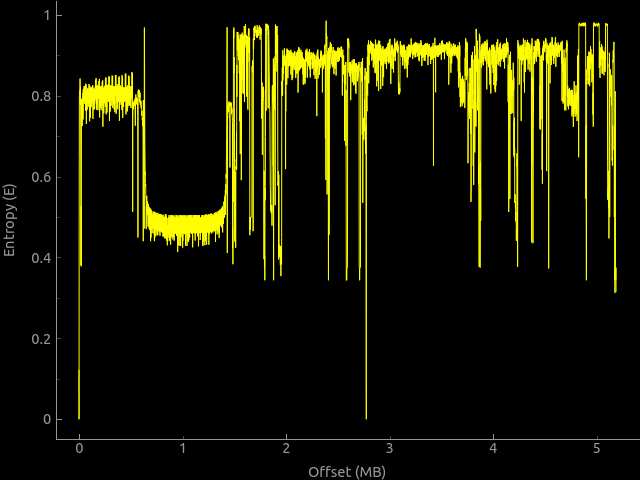

In [23]:
Image(filename='entropy.png')
# entropy.png was generated from binwalk

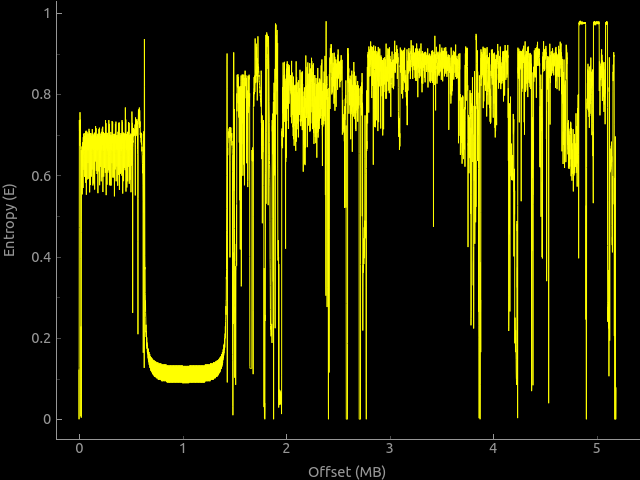

In [25]:
Image(filename='entropy_after_section_xor.png')

In [157]:
!binwalk firm.xor.1


DECIMAL       HEXADECIMAL     DESCRIPTION
--------------------------------------------------------------------------------
2384780       0x24638C        LZMA compressed data, properties: 0x5D, dictionary size: 16777216 bytes, missing uncompressed size
2401215       0x24A3BF        HTML document header
2408339       0x24BF93        PEM certificate
2410547       0x24C833        HTML document footer
2565856       0x2726E0        HTML document footer
3055257       0x2E9E99        GPG key trust database version 112
3259807       0x31BD9F        LZMA compressed data, properties: 0x5E, dictionary size: 16777216 bytes, uncompressed size: 513719291 bytes
3716999       0x38B787        LZMA compressed data, properties: 0x5D, dictionary size: 16777216 bytes, missing uncompressed size
3736989       0x39059D        GPG key trust database version 112
3818863       0x3A456F        SQLite 3.x database
3869404       0x3B0ADC        PEM RSA private key
4064021       0x3E0315        GPG key trust databas

In [42]:
'CERTIFICATE' in data_out

True

In [156]:
nb_sections = float(len(data)-0x800)/0x200
print "There are", nb_sections, "sections"
nb_distinct = len(Counter(section_keys.values()).most_common())
print "and", nb_distinct, "distinct keys"

There are 10136.0 sections
and 10013 distinct keys


Oh-oh...
so evidently, the heuristic to find the XOR keys is bad, but the obfuscation routine is to XOR 0x200 blocks of data.
Starting at 0x800.